# Hand Pose and Music Generation

In [1]:
import utils as u 

2024-04-19 17:36:00.857935: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
x_data, y_data = u.load_data() 
print(y_data)

[1 1 1 ... 0 0 0]


In [3]:
x_data, y_data = u.shuffle_data(x_data, y_data, random_seed=20) 
print(y_data)

[0 1 0 ... 1 0 0]


In [4]:
split_idx = int(len(x_data) * 0.8)
x_train, y_train, x_test, y_test = u.split_data(x_data, y_data, split_idx)

In [5]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(84059, 63) (84059,) (21015, 63) (21015,)


In [6]:
x_train, y_train, x_val, y_val, x_test, y_test = u.preprocess_data(x_train, 
                                                                 y_train, 
                                                                 x_test, 
                                                                 y_test)

In [7]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(75654, 63) (75654,) (21015, 63) (21015,)


In [8]:
print(len(x_train.shape))
print(x_train.max())
print(x_train.min())

print(len(x_test.shape))
print(x_test.max())
print(x_test.min())

2
0.7839571
-0.21448006
2
0.7839571
-0.21448006


TypeError: Cannot cast array data from dtype('float32') to dtype('int64') according to the rule 'safe'

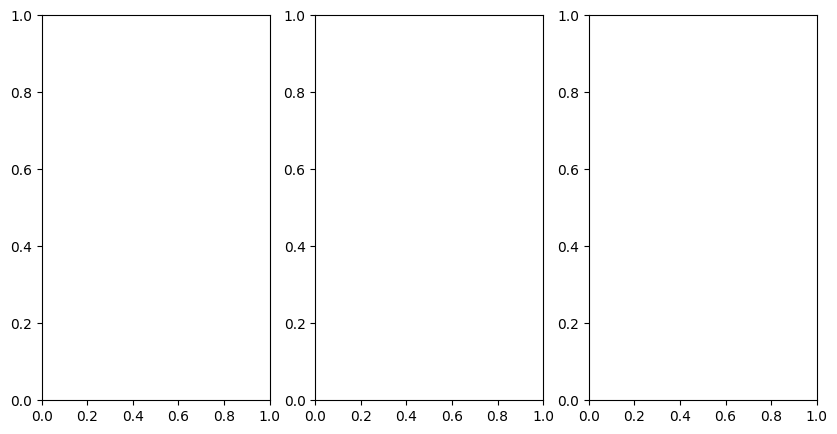

In [9]:
u.explore_data(x_train, y_train, y_test, y_val)

In [10]:
model = u.build_model()


In [11]:
history = u.train_model(model, x_train, y_train, x_val, y_val, 
                      epochs=30, batch_size=64)

Epoch 1/30
1183/1183 [==============================] - 3s 2ms/step - loss: 0.5031 - accuracy: 0.7285 - val_loss: 0.4837 - val_accuracy: 0.7234
Epoch 2/30
1183/1183 [==============================] - 2s 2ms/step - loss: 0.4787 - accuracy: 0.7317 - val_loss: 0.4779 - val_accuracy: 0.7253
Epoch 3/30
1183/1183 [==============================] - 2s 2ms/step - loss: 0.4740 - accuracy: 0.7321 - val_loss: 0.4766 - val_accuracy: 0.7253
Epoch 4/30
1183/1183 [==============================] - 2s 2ms/step - loss: 0.4718 - accuracy: 0.7338 - val_loss: 0.4743 - val_accuracy: 0.7253
Epoch 5/30
1183/1183 [==============================] - 2s 2ms/step - loss: 0.4705 - accuracy: 0.7335 - val_loss: 0.4756 - val_accuracy: 0.7253
Epoch 6/30
1183/1183 [==============================] - 2s 2ms/step - loss: 0.4702 - accuracy: 0.7334 - val_loss: 0.4733 - val_accuracy: 0.7253
Epoch 7/30
1183/1183 [==============================] - 2s 2ms/step - loss: 0.4690 - accuracy: 0.7335 - val_loss: 0.4721 - val_accuracy:

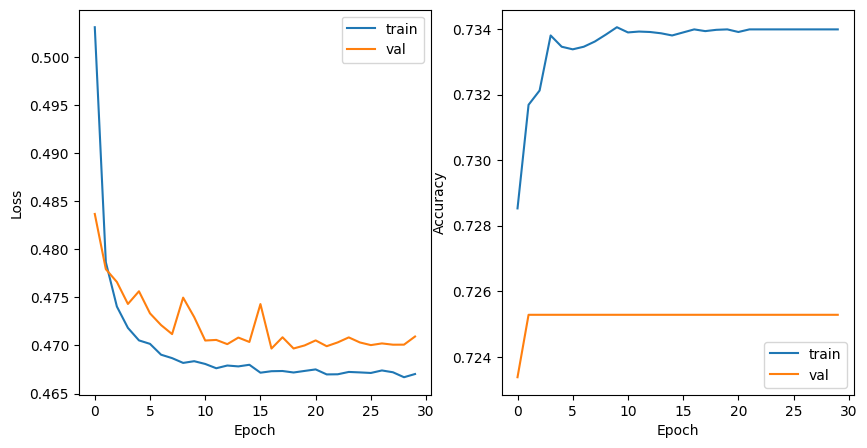

In [12]:
u.plot_loss(history)

In [13]:
test_acc, y_pred = u.test_model(model, x_test, y_test)
print(y_pred)

657/657 [==============================] - 1s 1ms/step


TypeError: cannot unpack non-iterable numpy.float64 object

In [ ]:
model.save('./Handpose-Recognition.h5')

In [ ]:
print(test_acc)

In [ ]:
model.summary()

In [ ]:
!tensorflowjs_converter \
    --input_format=keras \
    --output_format=tfjs_graph_model \
    --saved_model_tags=serve \
    /Users/qianruzhang/Documents/GitHub/Machine-Learning-ML5/Week5-Real-Time-Handpose-Recognition/ML/Handpose-Recognition.keras \
    /Users/qianruzhang/Documents/GitHub/Machine-Learning-ML5/Week5-Real-Time-Posture-Recognition/tfjsmodel
